In [169]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [170]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [171]:
#Assuming the price is in dollars as data is not given
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


<h3>Data Cleaning</h3>

In [172]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

ADDRESSLINE2, STATE, POSTALCODE, TERRITORY have missing values. However, as the city is given, we can still analyze the location of the customer based on the city, so removing the 4 columns should not drastically affect the data. Also, as ADDRESSLINE1 has no null values, we can use that for further analysis. 

In [173]:
df1 = df.drop(columns=['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY'])

In [174]:
df1.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [175]:
#Check for duplicates
df1.duplicated().sum()

0

In [176]:
df1.rename(columns={'ORDERNUMBER': 'Order Number', 'QUANTITYORDERED' : 'Quantity Ordered', 'PRICEEACH' : 'Price', 
                   'ORDERLINENUMBER' : 'Order Line Number', 'SALES' : 'Sales', 'ORDERDATE' : 'Order Date', 'STATUS' : 'Status', 
                   'QTR_ID' : 'Quarter', 'MONTH_ID' : 'Month', 'YEAR_ID' : 'Year', 'PRODUCTLINE' : 'Product Line', 
                   'PRODUCTCODE' : 'Product Code', 'CUSTOMERNAME' : 'Company Name', 'PHONE' : 'Phone Number',
                   'ADDRESSLINE1': 'Address', 'CITY' : 'City', 'COUNTRY' : 'Country', 'CONTACTLASTNAME' : 'Last Name', 
                   'CONTACTFIRSTNAME' : 'First Name', 'DEALSIZE' : 'Deal Size'}, inplace = True)

In [177]:
df1.head()

,Order Number,Quantity Ordered,Price,Order Line Number,Sales,Order Date,Status,Quarter,Month,Year,...,MSRP,Product Code,Company Name,Phone Number,Address,City,Country,Last Name,First Name,Deal Size
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


In [178]:
#Since we have Order Date, we can remove the Quarter, Month, and Year columns
dfClean = df1.drop(columns=['Quarter', 'Month', 'Year'])

#Change 'Order Date' to datetime format
dfClean['Order Date'] = pd.to_datetime(dfClean['Order Date'])
dfClean.head(5)

,Order Number,Quantity Ordered,Price,Order Line Number,Sales,Order Date,Status,Product Line,MSRP,Product Code,Company Name,Phone Number,Address,City,Country,Last Name,First Name,Deal Size
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


In [179]:
#Set index to 'Order Date'
dfNew = dfClean.set_index('Order Date')
dfNew

,Order Number,Quantity Ordered,Price,Order Line Number,Sales,Status,Product Line,MSRP,Product Code,Company Name,Phone Number,Address,City,Country,Last Name,First Name,Deal Size
Order Date,,,,,,,,,,,,,,,,,
2003-02-24,10107,30,95.70,2,2871.00,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
2003-05-07,10121,34,81.35,5,2765.90,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2003-07-01,10134,41,94.74,2,3884.34,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
2003-08-25,10145,45,83.26,6,3746.70,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
2003-10-10,10159,49,100.00,14,5205.27,Shipped,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-02,10350,20,100.00,15,2244.40,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Small
2005-01-31,10373,29,100.00,1,3978.51,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,Finland,Koskitalo,Pirkko,Medium
2005-03-01,10386,43,100.00,4,5417.57,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Medium


## Data Analysis

### Sales per Year

In [180]:
dfNew['Status'].value_counts()

Status
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [181]:
#Only taking into account shipped orders
dfFilter = dfNew[dfNew['Status'] == 'Shipped']
print(dfFilter['Status'].value_counts())
print()

print('Yearly Sales: ')
yearlySales = dfFilter.resample('Y')['Sales'].sum()
yearlySales = yearlySales.reset_index()
yearlySales

Status
Shipped    2617
Name: count, dtype: int64

Yearly Sales: 


,Order Date,Sales
0,2003-12-31,3439718.03
1,2004-12-31,4528047.22
2,2005-12-31,1323735.83


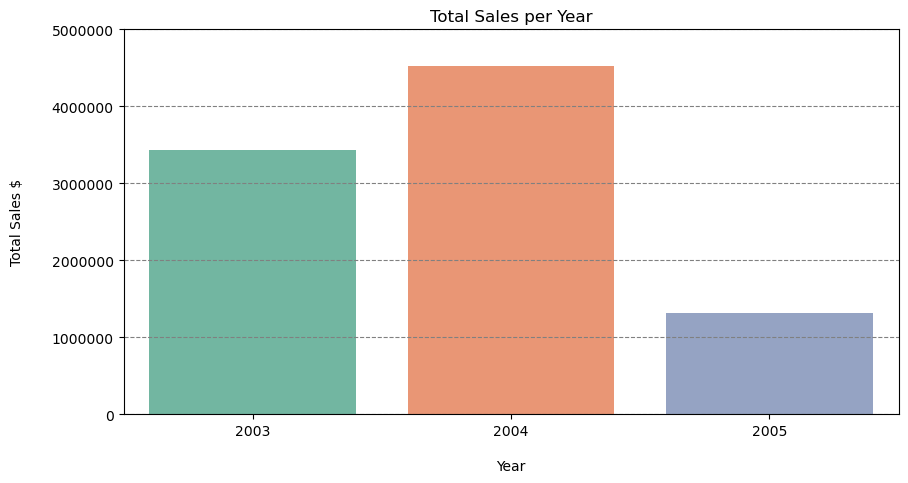

In [182]:
#Visualizing Yearly Sales
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(10, 5))
sns.barplot(x = yearlySales['Order Date'].dt.year, y = yearlySales['Sales'], palette = 'Set2')
plt.title('Total Sales per Year')
plt.xlabel('Year', labelpad = 15)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')
plt.ylim(0, 5000000)
plt.ylabel('Total Sales $', labelpad = 20)
plt.grid(axis = 'y', linestyle = '--', color = 'grey')
plt.show()

### Highest Sales Quarters Each Year

In [183]:
dfShipped = dfClean[dfClean['Status'] == 'Shipped']
df2003 = dfShipped[dfShipped['Order Date'] < '2004-01-01']
df2004 = dfShipped[(dfShipped['Order Date'] > '2004-01-01') & (dfShipped['Order Date'] < '2005-01-01')]
df2005 = dfShipped[dfShipped['Order Date'] > '2004-12-31']

In [184]:
sales2003 = df2003.groupby(pd.Grouper(key = 'Order Date', freq = 'Q'))['Sales'].sum()
dfSales2003 = sales2003.reset_index()

sales2004 = df2004.groupby(pd.Grouper(key = 'Order Date', freq = 'Q'))['Sales'].sum()
dfSales2004 = sales2004.reset_index()

sales2005 = df2005.groupby(pd.Grouper(key = 'Order Date', freq = 'Q'))['Sales'].sum()
dfSales2005 = sales2005.reset_index()

print(f"{sales2003} \n{sales2004} \n{sales2005}")

Order Date
2003-03-31     445094.69
2003-06-30     562365.22
2003-09-30     649514.54
2003-12-31    1782743.58
Freq: Q-DEC, Name: Sales, dtype: float64 
Order Date
2004-03-31     833730.68
2004-06-30     620484.17
2004-09-30    1109396.27
2004-12-31    1964436.10
Freq: Q-DEC, Name: Sales, dtype: float64 
Order Date
2005-03-31    973903.28
2005-06-30    349832.55
Freq: Q-DEC, Name: Sales, dtype: float64


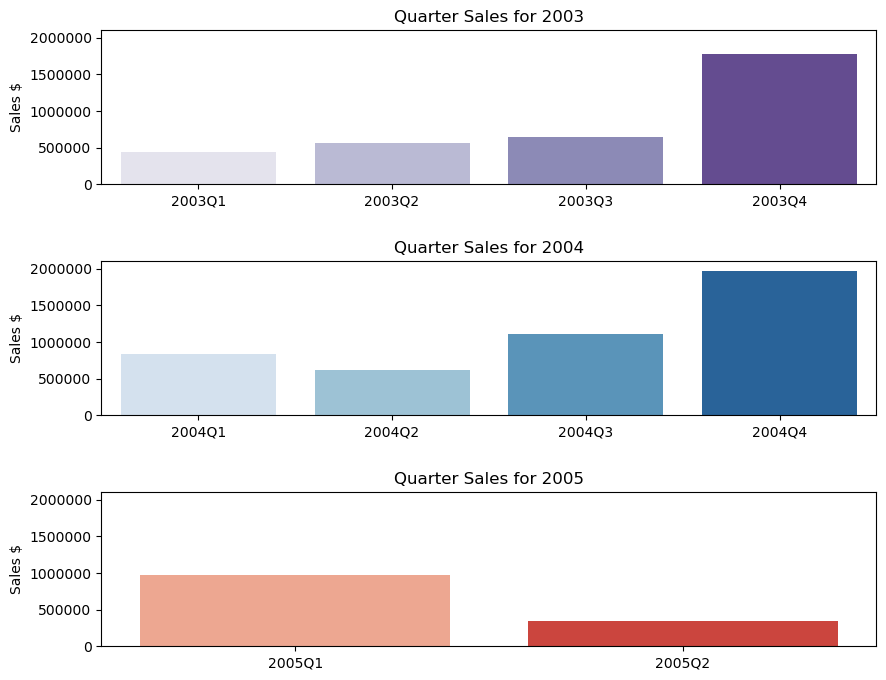

In [185]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize=(10, 8))

fig.subplots_adjust(hspace = 0.5)

#2003 Data
plt.sca(ax1)
sns.barplot(x = dfSales2003['Order Date'].dt.to_period('Q'), y = dfSales2003['Sales'], palette = 'Purples')
plt.ylabel('Sales $')
plt.title('Quarter Sales for 2003')
plt.xlabel('')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')
plt.ylim(0, 2100000)

#2004 Data
plt.sca(ax2)
sns.barplot(x = dfSales2004['Order Date'].dt.to_period('Q'), y = dfSales2004['Sales'], palette = 'Blues')
plt.title('Quarter Sales for 2004')
plt.xlabel('')
plt.ylabel('Sales $')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')
plt.ylim(0, 2100000)

#2005 Data
plt.sca(ax3)
sns.barplot(x = dfSales2005['Order Date'].dt.to_period('Q'), y = dfSales2005['Sales'], palette = 'Reds')
plt.title('Quarter Sales for 2005')
plt.xlabel('')
plt.ylabel('Sales $')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')
plt.ylim(0, 2100000)

plt.show()

## 

Based on the data, it's evident that the fourth quarter consistently generates the highest revenue. Notably, 2005 only includes data for the first two quarters. However, when comparing the first quarters of 2004 and 2005, it becomes clear that the strong performance in the fourth quarter of the previous year positively impacts the sales in the first quarter of the following year.

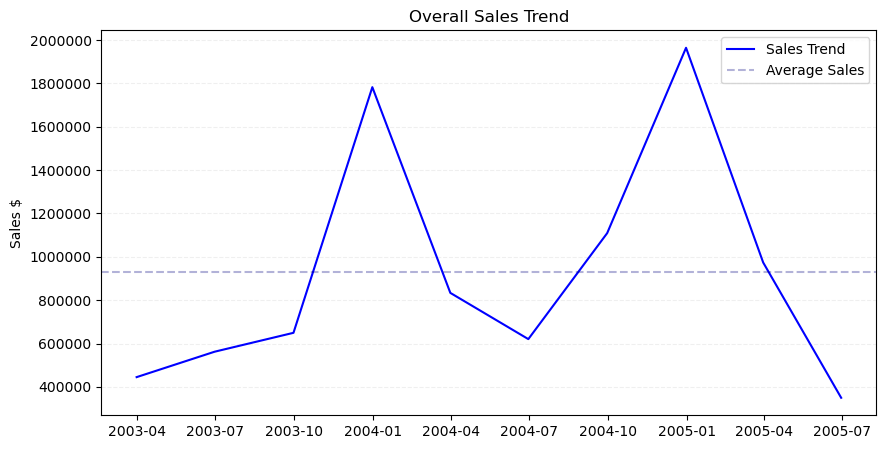

In [186]:
#Overall Trend 
overallTrend = dfShipped.groupby(pd.Grouper(key = 'Order Date', freq = 'Q'))['Sales'].sum()
dfOverall = overallTrend.reset_index()
a = dfOverall['Order Date'].map(pd.Timestamp.toordinal)

#Visualization 

plt.figure(figsize=(10, 5))
plt.plot(dfOverall['Order Date'], dfOverall['Sales'], color = "blue", label = 'Sales Trend')
plt.title('Overall Sales Trend')
plt.xlabel('')
plt.ylabel('Sales $')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(style='plain', axis='y')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.2)
plt.axhline(dfOverall['Sales'].mean(), label = "Average Sales", alpha = 0.3, color = 'navy', linestyle = '--')
plt.legend()
plt.show()

This further supports the data above.

### Countries with Most Customers

I will analyze both the unique and total number of customers in each country to determine where the majority of our customer base originates. Additionally, I will identify which country has the highest number of recurring customers. For this analysis, I focus on the subset of successful transactions in our dataset.

###### Customers and Companies will be used interchangeably 

In [187]:
#Seeing the difference in unique and total companies

#Unique Companies Count
print('Unique Companies: ')
print(dfShipped['Company Name'].nunique())

#Total Companies Count
print('Total Companies: ')
print(len(dfShipped['Company Name']))

Unique Companies: 
92
Total Companies: 
2617


In [188]:
#Unique Companies df

countryCompany = dfShipped.groupby('Country')['Company Name'].nunique()
dfCountryCompany = countryCompany.reset_index()
dfCountryCompanySorted = dfCountryCompany.sort_values(by='Company Name', ascending=False)
dfCountryCompany = dfCountryCompanySorted.rename(columns={'Company Name' : 'Companies'})

#Cross Referencing with the value above
print('Total Companies:', dfCountryCompany['Companies'].sum())
dfCountryCompany

Total Companies: 92


,Country,Companies
18,USA,35
6,France,12
17,UK,5
14,Spain,5
0,Australia,5
5,Finland,3
7,Germany,3
11,Norway,3
3,Canada,3
9,Italy,3


In [189]:
#Total Customers df

totalCompanies = dfShipped.groupby('Country')['Company Name'].count()
dfTotalCompanies = totalCompanies.reset_index()
dfTotalCompanies = dfTotalCompanies.rename(columns={'Company Name' : 'Companies'})
dfTotalCompanies = dfTotalCompanies.sort_values(by='Companies', ascending = False)

#Cross Referencing with the value above
print('Total Companies:', dfTotalCompanies['Companies'].sum())
dfTotalCompanies

Total Companies: 2617


,Country,Companies
18,USA,935
6,France,301
14,Spain,296
0,Australia,167
17,UK,130
9,Italy,113
5,Finland,92
11,Norway,85
13,Singapore,79
3,Canada,70


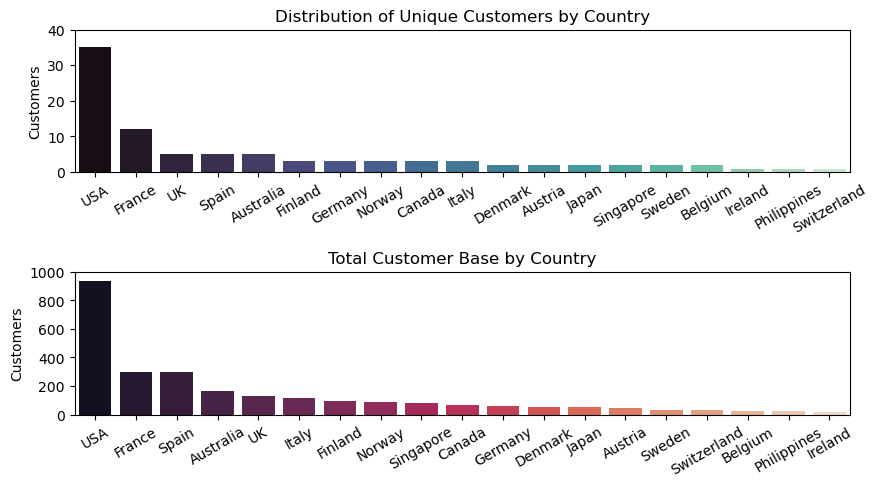

In [190]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(10,5))

fig.subplots_adjust(hspace = 0.7)

plt.sca(ax1)
sns.barplot(x = dfCountryCompany['Country'], y = dfCountryCompany['Companies'], palette = 'mako')
plt.title('Distribution of Unique Customers by Country')
plt.xlabel("")
plt.ylabel("Customers")
plt.xticks(rotation = 30)
plt.ylim(0, 40)

plt.sca(ax2)
sns.barplot(x = dfTotalCompanies['Country'], y = dfTotalCompanies['Companies'], palette = 'rocket')
plt.title('Total Customer Base by Country')
plt.xlabel("")
plt.ylabel("Customers")
plt.xticks(rotation = 30)
plt.ylim(0, 1000)
plt.show()

Based on the data, the United States emerges as the company’s largest demographic by a significant margin. Both the USA and France have the highest customer counts and exhibit a strong trend of returning customers. Furthermore, the top five countries in terms of customer presence (both unique and total) are the USA, France, UK, Spain, and Australia.

This information is crucial for tailoring marketing strategies and customer retention programs. Given the high number of returning customers in the USA and France, targeted loyalty programs in these regions could further enhance customer retention. Similarly, understanding the market dynamics in the UK, Spain, and Australia can help optimize regional sales strategies.

### Distribution of Product Line Sales Across Countries

Understanding the distribution of product line sales across different countries is crucial for tailoring marketing strategies and optimizing inventory management. By identifying which products are most popular in each region, the company can focus its efforts on high-demand items, improve customer satisfaction, and increase overall sales efficiency.

In [191]:
productCountry = dfShipped.groupby(['Product Line'])['Country'].value_counts()
productCountry = productCountry.reset_index()
productCountry

,Product Line,Country,count
0,Classic Cars,USA,312
1,Classic Cars,Spain,118
2,Classic Cars,France,93
3,Classic Cars,Australia,46
4,Classic Cars,Finland,38
...,...,...,...
108,Vintage Cars,Sweden,8
109,Vintage Cars,Denmark,7
110,Vintage Cars,Finland,7
111,Vintage Cars,Philippines,1


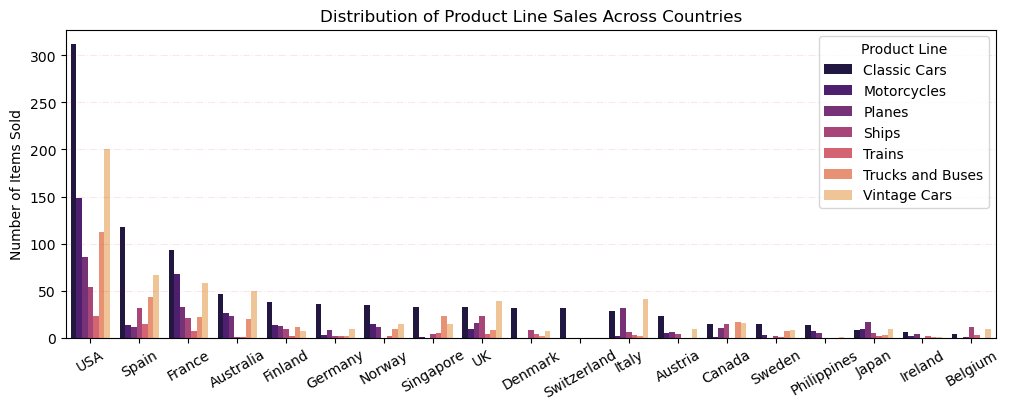

In [192]:
plt.figure(figsize=(12,4))
sns.barplot(x = productCountry['Country'], y = productCountry['count'], hue = productCountry['Product Line'], palette = 'magma')
plt.xticks(rotation=30)
plt.title('Distribution of Product Line Sales Across Countries')
plt.xlabel('')
plt.ylabel('Number of Items Sold')
plt.grid(axis = 'y', alpha = 0.1, linestyle = '-.', color = 'crimson')
plt.legend(title='Product Line', loc='upper right')
plt.show()

As shown in the graph above, classic cars are a favorite among customers in every country. Vintage cars also have a significant presence in most markets. In contrast, trains are not as popular, being the least sold product line in many regions. Although sales of other product lines vary across countries, this data provides valuable insights for targeted marketing and strategic planning. Understanding these preferences allows the company to tailor its product offerings and marketing efforts to better meet the demands of each specific market, ultimately driving sales and enhancing customer satisfaction.

### Analyzing Sales for Each Product

By examining the relationship between sales and product codes within each product line, we can gain a deeper understanding of product performance, customer preferences, and market trends.

I will categorize the products by their product lines to avoid clutter in the visualization, as there are many products which could otherwise make the graph difficult to interpret.

In [193]:
productSales = dfShipped.groupby(['Product Line', 'Product Code'])['Sales'].sum()
dfProductSales = productSales.reset_index()

#Creating a df for each product line
dfClassicCars = dfProductSales[dfProductSales['Product Line'] == 'Classic Cars'].sort_values(by='Sales', ascending=False)
dfMotorcycles = dfProductSales[dfProductSales['Product Line'] == 'Motorcycles'].sort_values(by='Sales', ascending=False)
dfPlanes = dfProductSales[dfProductSales['Product Line'] == 'Planes'].sort_values(by='Sales', ascending=False)
dfShips = dfProductSales[dfProductSales['Product Line'] == 'Ships'].sort_values(by='Sales', ascending=False)
dfTrains = dfProductSales[dfProductSales['Product Line'] == 'Trains'].sort_values(by='Sales', ascending=False)
dfTrucksBuses = dfProductSales[dfProductSales['Product Line'] == 'Trucks and Buses'].sort_values(by='Sales', ascending=False)
dfVintageCars = dfProductSales[dfProductSales['Product Line'] == 'Vintage Cars'].sort_values(by='Sales', ascending=False)



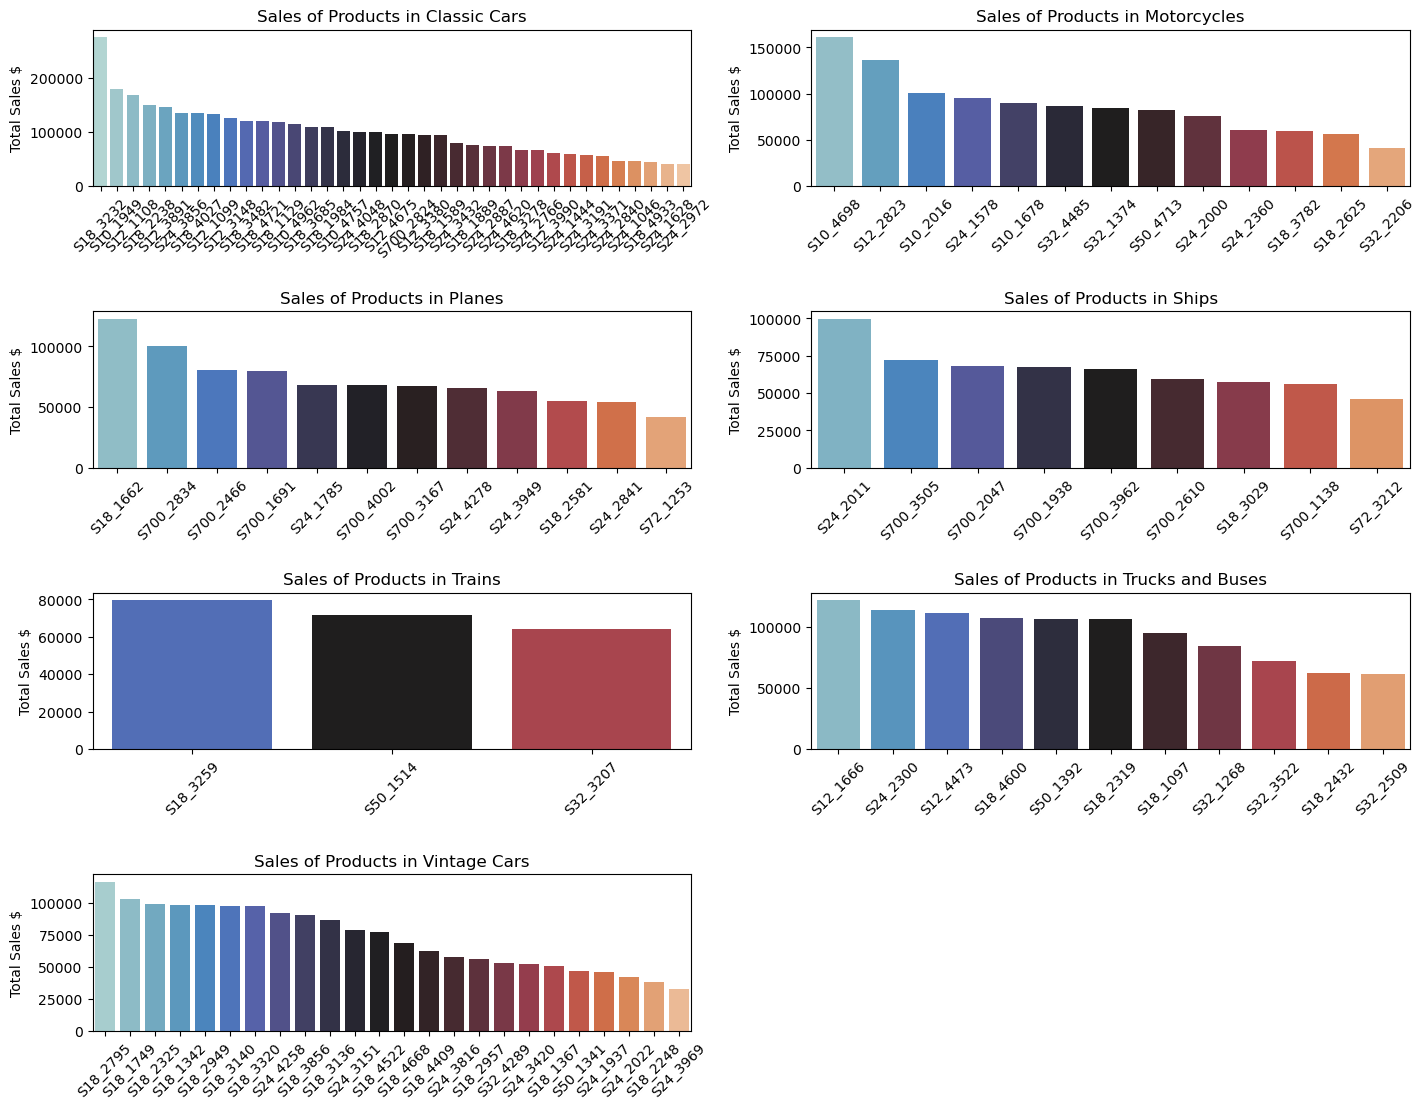

In [194]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2, figsize=(17, 13))

fig.subplots_adjust(hspace = 0.8)

plt.sca(ax1)
sns.barplot(x = dfClassicCars['Product Code'], y = dfClassicCars['Sales'], palette = 'icefire')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Total Sales $")
plt.title('Sales of Products in Classic Cars')

plt.sca(ax2)
sns.barplot(x = dfMotorcycles['Product Code'], y = dfMotorcycles['Sales'], palette = 'icefire')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Total Sales $")
plt.title('Sales of Products in Motorcycles')

plt.sca(ax3)
sns.barplot(x = dfPlanes['Product Code'], y = dfPlanes['Sales'], palette = 'icefire')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Total Sales $")
plt.title('Sales of Products in Planes')

plt.sca(ax4)
sns.barplot(x = dfShips['Product Code'], y = dfShips['Sales'], palette = 'icefire')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Total Sales $")
plt.title('Sales of Products in Ships')

plt.sca(ax5)
sns.barplot(x = dfTrains['Product Code'], y = dfTrains['Sales'], palette = 'icefire')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Total Sales $")
plt.title('Sales of Products in Trains')

plt.sca(ax6)
sns.barplot(x = dfTrucksBuses['Product Code'], y = dfTrucksBuses['Sales'], palette = 'icefire')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Total Sales $")
plt.title('Sales of Products in Trucks and Buses')

plt.sca(ax7)
sns.barplot(x = dfVintageCars['Product Code'], y = dfVintageCars['Sales'], palette = 'icefire')
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Total Sales $")
plt.title('Sales of Products in Vintage Cars')

ax8.remove()
    
plt.show()

From the data above, it is evident that several products within the Classic Car product line generated more than 100,000 dollars in sales. Notably, the product with the code "S18_3232" is the highest sales-earner, generating approximately 100,000 dollars more than the second highest sales-earning product. In comparison, other product lines do not have as many products achieving a similar level of sales. Additionally, supporting the analysis in the "Distribution of Product Line Sales Across Countries," the Trains product line is not very popular. This results in the product line having the fewest items and generating the least amount of sales compared to the other product lines.

### Finding Price Discrimination Among Countries

In this section, I will analyze the pricing of products across different countries to identify any instances of price discrimination. By examining the average prices of the same products in various countries, I aim to determine if there are significant price variations. This analysis will help uncover potential pricing strategies tailored to different markets. Understanding these patterns can provide insights into how companies optimize their pricing for profitability and market penetration.

In [195]:
#Firstly, the product line will be looked at so we can analyze the product codes if discrimination is found

productPrices = dfShipped.groupby(['Country','Product Line'])['Price'].mean()
dfProductPrices = productPrices.reset_index()
dfProductPrices

,Country,Product Line,Price
0,Australia,Classic Cars,85.778261
1,Australia,Motorcycles,82.820385
2,Australia,Planes,87.448696
3,Australia,Ships,45.390000
4,Australia,Trains,50.950000
...,...,...,...
108,USA,Planes,82.856512
109,USA,Ships,84.142593
110,USA,Trains,71.229565
111,USA,Trucks and Buses,86.732768


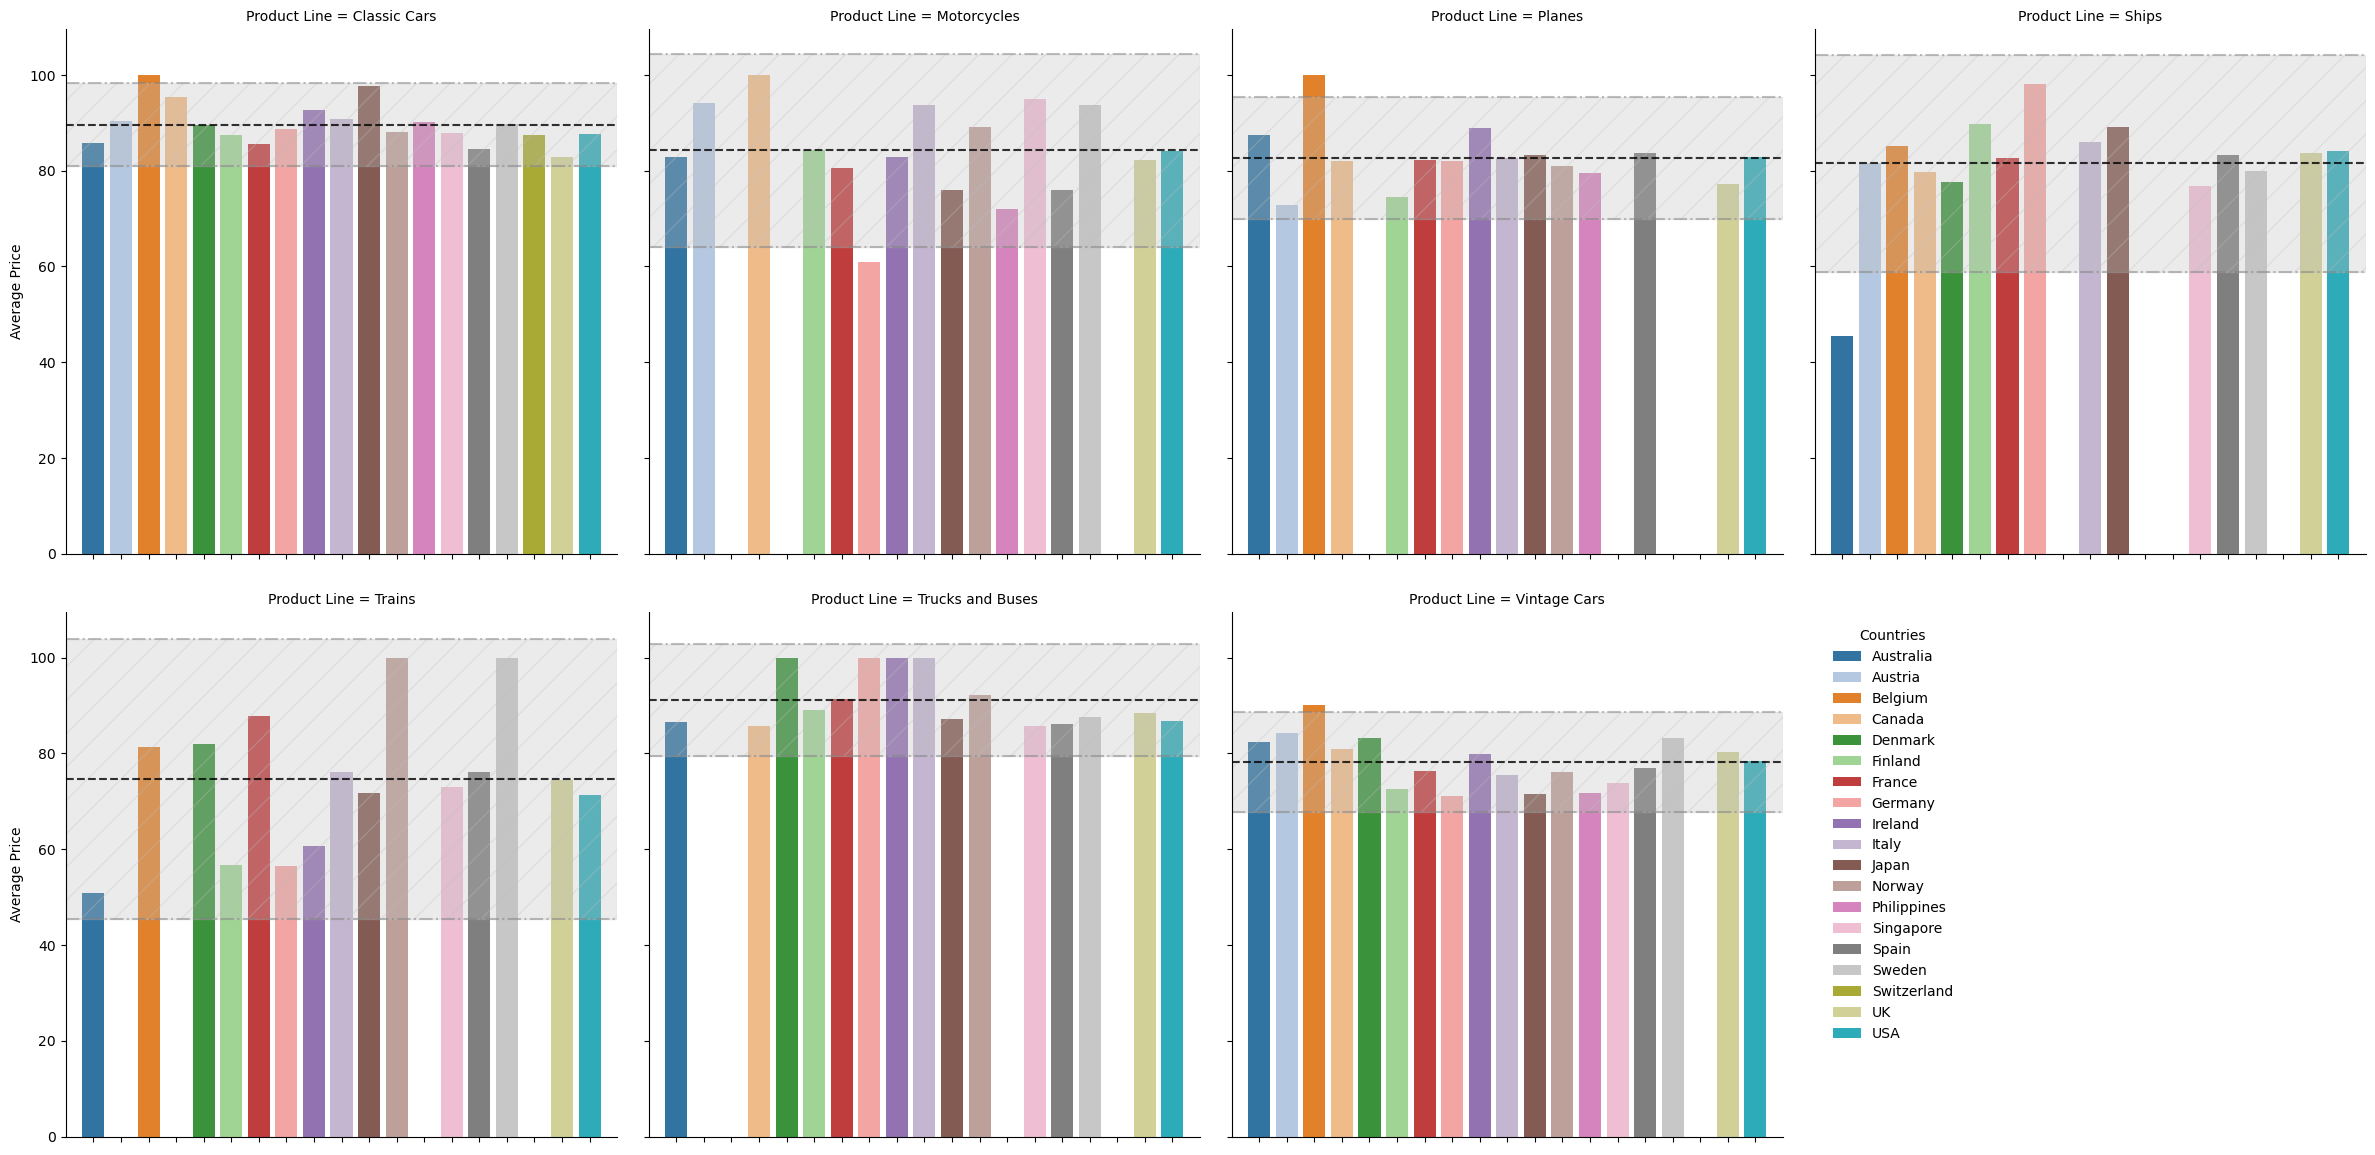

In [196]:
g = sns.FacetGrid(dfProductPrices, col = 'Product Line', col_wrap = 4, height = 6, hue = 'Country', palette = 'tab20')
g.map(sns.barplot, 'Country', 'Price', order = dfProductPrices['Country'].unique())
g.set_xticklabels()
g.set_xlabels(label = "")
g.set_ylabels(label = "Average Price")
for ax, (productLine, subset) in zip(g.axes.flat, dfProductPrices.groupby('Product Line')):
    meanPrice = subset['Price'].mean() #Mean of each product line
    thresholdUpper = meanPrice + (subset['Price'].std() * 2) #Upper threshold value using 2 standard deviation
    thresholdLower = meanPrice - (subset['Price'].std() * 2) #Lower threshold value usiing 2 standard deviation
    ax.axhline(y = meanPrice, color = 'black', linestyle = '--', alpha = 0.8, label = '_nolegend_')
    ax.axhline(y = thresholdUpper, color = 'grey', linestyle = '-.', alpha = 0.5, label = '_nolegend_')
    ax.axhline(y = thresholdLower, color = 'grey', linestyle = '-.', alpha = 0.5, label = '_nolegend_')
    xlim = ax.set_xlim(-1, len(dfProductPrices['Country'].unique()))
    ax.fill_between(xlim, thresholdUpper, thresholdLower, color = 'silver', alpha = 0.3, hatch = '/')
g.add_legend(title = 'Countries', bbox_to_anchor = (0.78, 0.3), loc = 'center right')

plt.show()

The analysis employs mean and standard deviation to establish upper and lower threshold values, identifying countries deviating significantly from expected pricing patterns. Considering 2 standard deviations, any country surpassing these limits falls outside the 95% confidence interval. Consequently, such instances require further investigation.

Upon review, Belgium marginally exceeds the upper threshold in the 'Classic Cars', 'Planes', and 'Vintage Cars' product lines. On the other hand, Germany demonstrates lower-than-expected payments in the 'Motorcycle' line, while Australia pays below the lower threshold in the 'Ships' category.

<h4>Investigating Belgium's Prices</h4>

In [197]:
dfBelgium = dfShipped[dfShipped['Country'] == "Belgium"]
dfBelgiumFiltered = dfBelgium[dfBelgium['Product Line'].isin(['Classic Cars', 'Planes', 'Vintage Cars'])]
dfBelgiumFiltered.sort_values(by = 'Product Line')

,Order Number,Quantity Ordered,Price,Order Line Number,Sales,Order Date,Status,Product Line,MSRP,Product Code,Company Name,Phone Number,Address,City,Country,Last Name,First Name,Deal Size
119,10273,30,100.00,4,3508.80,2004-07-21,Shipped,Classic Cars,136,S10_4757,Petit Auto,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Belgium,Dewey,Catherine,Medium
648,10366,34,100.00,3,4207.84,2005-01-10,Shipped,Classic Cars,142,S18_1984,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Charleroi,Belgium,Cartrain,Pascale,Medium
877,10366,49,100.00,2,6144.60,2005-01-10,Shipped,Classic Cars,132,S18_2870,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Charleroi,Belgium,Cartrain,Pascale,Medium
1056,10366,34,100.00,1,6275.72,2005-01-10,Shipped,Classic Cars,169,S18_3232,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Charleroi,Belgium,Cartrain,Pascale,Medium
571,10338,41,100.00,1,5624.79,2004-11-22,Shipped,Planes,157,S18_1662,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Charleroi,Belgium,Cartrain,Pascale,Medium
998,10221,33,100.00,3,4417.38,2004-02-18,Shipped,Vintage Cars,136,S18_3140,Petit Auto,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Belgium,Dewey,Catherine,Medium
1001,10273,40,100.00,13,5026.40,2004-07-21,Shipped,Vintage Cars,136,S18_3140,Petit Auto,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Belgium,Dewey,Catherine,Medium
1228,10273,50,85.75,1,4287.50,2004-07-21,Shipped,Vintage Cars,105,S18_3856,Petit Auto,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Belgium,Dewey,Catherine,Medium
1234,10338,45,100.00,2,5526.45,2004-11-22,Shipped,Vintage Cars,105,S18_3856,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Charleroi,Belgium,Cartrain,Pascale,Medium
1299,10221,39,89.53,2,3491.67,2004-02-18,Shipped,Vintage Cars,87,S18_4522,Petit Auto,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Belgium,Dewey,Catherine,Medium


Upon reviewing the data on the 'Distribution of Product Line Sales Across Countries,' it's evident that Belgium has the lowest sales figures among the countries analyzed. Similarly, in the 'Countries with Most Customers' dataset, Belgium ranks low in both unique and total customer counts compared to other nations. This discrepancy suggests a potential price discrimination strategy targeting Belgium to maintain sales levels comparable to those in regions with higher customer bases. In such regions, competition among companies with recurring and unique customer segments is likely more intense, leading to increased product purchases in Belgium. Additionally, companies in countries with higher sales may offer more bulk sales or discounts due to recurring partnerships, thereby further influencing pricing dynamics. It's worth noting that Belgium's deviation from the mean is not significantly higher than 2 standard deviations, but rather by a small margin.

<h4>Investing Germany's price</h4>

In [198]:
dfGermany = dfShipped[dfShipped['Country'].isin(['Germany'])]
dfGermanyFiltered = dfGermany[dfGermany['Product Line'] =='Motorcycles']
dfGermanyFiltered.sort_values(by = 'Country')

,Order Number,Quantity Ordered,Price,Order Line Number,Sales,Order Date,Status,Product Line,MSRP,Product Code,Company Name,Phone Number,Address,City,Country,Last Name,First Name,Deal Size
1197,10191,43,72.74,9,3127.82,2003-11-20,Shipped,Motorcycles,62,S18_3782,"Toms Spezialitten, Ltd",0221-5554327,Mehrheimerstr. 369,Koln,Germany,Pfalzheim,Henriette,Medium
1206,10310,42,67.14,16,2819.88,2004-10-16,Shipped,Motorcycles,62,S18_3782,"Toms Spezialitten, Ltd",0221-5554327,Mehrheimerstr. 369,Koln,Germany,Pfalzheim,Henriette,Small
2213,10310,36,43.05,17,1549.80,2004-10-16,Shipped,Motorcycles,40,S32_2206,"Toms Spezialitten, Ltd",0221-5554327,Mehrheimerstr. 369,Koln,Germany,Pfalzheim,Henriette,Small


Analyzing the data reveals a decreasing trend in product prices over time, suggesting potential discounts offered by the company, possibly to incentivize repeat purchases. Given that only one German company appears to have purchased products from the 'Motorcycles' product line, this could explain why the average price fell below the lower threshold. It's plausible that if more German companies were included in the dataset, the average price might have been higher.

<h4>Investing Australia's price</h4>

In [199]:
dfAustralia = dfShipped[dfShipped['Country'].isin(['Australia'])]
dfAustraliaFiltered = dfAustralia[dfAustralia['Product Line'] =='Ships']
dfAustraliaFiltered.sort_values(by = 'Country')

,Order Number,Quantity Ordered,Price,Order Line Number,Sales,Order Date,Status,Product Line,MSRP,Product Code,Company Name,Phone Number,Address,City,Country,Last Name,First Name,Deal Size
2555,10361,24,45.39,14,1089.36,2004-12-17,Shipped,Ships,90,S700_2047,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Small


In [200]:
dfAustraliaComp = dfAustralia.groupby('Company Name')['Product Line'].count()
dfAustraliaComp

Company Name
Anna's Decorations, Ltd         46
Australian Collectables, Ltd    18
Australian Collectors, Co.      55
Australian Gift Network, Co     15
Souveniers And Things Co.       33
Name: Product Line, dtype: int64

In [201]:
#Finding if there were more items ordered in the same day
dfComp = dfAustralia[dfAustralia['Company Name'] == 'Souveniers And Things Co.']
dfOrderNumber = dfComp[dfComp['Order Number'] == 10361]
dfOrderNumber

,Order Number,Quantity Ordered,Price,Order Line Number,Sales,Order Date,Status,Product Line,MSRP,Product Code,Company Name,Phone Number,Address,City,Country,Last Name,First Name,Deal Size
21,10361,20,72.55,13,1451.00,2004-12-17,Shipped,Motorcycles,95,S10_1678,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Small
75,10361,26,51.15,8,1329.90,2004-12-17,Shipped,Motorcycles,118,S10_2016,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Small
1915,10361,34,100.00,6,3871.92,2004-12-17,Shipped,Vintage Cars,65,S24_3420,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Medium
2018,10361,26,100.00,7,3710.98,2004-12-17,Shipped,Planes,68,S24_3949,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Medium
2116,10361,25,62.46,1,1561.50,2004-12-17,Shipped,Planes,72,S24_4278,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Small
2321,10361,49,72.33,2,3544.17,2004-12-17,Shipped,Vintage Cars,68,S32_4289,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Medium
2372,10361,33,82.59,3,2725.47,2004-12-17,Shipped,Vintage Cars,43,S50_1341,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Small
2503,10361,20,60.54,4,1210.80,2004-12-17,Shipped,Planes,91,S700_1691,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Small
2555,10361,24,45.39,14,1089.36,2004-12-17,Shipped,Ships,90,S700_2047,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Small
2582,10361,26,100.00,9,2754.70,2004-12-17,Shipped,Planes,99,S700_2466,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,Australia,Huxley,Adrian,Small


In [202]:
#Total Sales from Order Number 10361
print(f"Souvernies And Things Co. paid around ${np.round(dfOrderNumber['Sales'].sum())} for the Order Number, 10361")

Souvernies And Things Co. paid around $37905.0 for the Order Number, 10361


In [203]:
#Seeing what other paid for the same product
dfShipped[dfShipped['Product Code'] == 'S700_2047']

,Order Number,Quantity Ordered,Price,Order Line Number,Sales,Order Date,Status,Product Line,MSRP,Product Code,Company Name,Phone Number,Address,City,Country,Last Name,First Name,Deal Size
2534,10106,30,100.00,16,3177.30,2003-02-17,Shipped,Ships,90,S700_2047,Rovelli Gifts,035-640555,Via Ludovico il Moro 22,Bergamo,Italy,Rovelli,Giovanni,Medium
2535,10119,29,94.14,7,2730.06,2003-04-28,Shipped,Ships,90,S700_2047,Salzburg Collectables,6562-9555,Geislweg 14,Salzburg,Austria,Pipps,Georg,Small
2536,10131,22,85.99,8,1891.78,2003-06-16,Shipped,Ships,90,S700_2047,Gift Ideas Corp.,2035554407,2440 Pompton St.,Glendale,USA,Lewis,Dan,Small
2537,10143,26,100.00,11,2612.48,2003-08-10,Shipped,Ships,90,S700_2047,Mini Creations Ltd.,5085559555,4575 Hillside Dr.,New Bedford,USA,Tam,Wing C,Small
2538,10155,32,91.43,9,2925.76,2003-10-06,Shipped,Ships,90,S700_2047,"Toys of Finland, Co.",90-224 8555,Keskuskatu 45,Helsinki,Finland,Karttunen,Matti,Small
2540,10178,34,96.86,8,3293.24,2003-11-08,Shipped,Ships,90,S700_2047,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,France,Roulet,Annette,Medium
2541,10186,24,99.57,5,2389.68,2003-11-14,Shipped,Ships,90,S700_2047,"Double Decker Gift Stores, Ltd",(171) 555-7555,120 Hanover Sq.,London,UK,Hardy,Thomas,Small
2542,10197,24,90.52,2,2172.48,2003-11-26,Shipped,Ships,90,S700_2047,Enaco Distributors,(93) 203 4555,"Rambla de Catalu¤a, 23",Barcelona,Spain,Saavedra,Eduardo,Small
2543,10209,33,88.71,4,2927.43,2004-01-09,Shipped,Ships,90,S700_2047,"Men 'R' US Retailers, Ltd.",2155554369,6047 Douglas Av.,Los Angeles,USA,Chandler,Michael,Small
2544,10222,26,100.00,8,2659.54,2004-02-19,Shipped,Ships,90,S700_2047,Collectable Mini Designs Co.,7605558146,361 Furth Circle,San Diego,USA,Thompson,Valarie,Small


Upon reviewing the data, it's evident that 'Souveniers And Things Co.' placed a substantial order for products from the 'Ships' product line, totaling approximately $37,905, which accounts for roughly 2.9\% of the total order amount. Specifically, the product 'S700_2047' purchased by the company was sold at higher prices to other customers, indicating a potential discount for this particular order. This assumption is supported by the fact that Souveniers And Things Co. had already made a large purchase order, number 10361, and this product may have been a smaller add-on to their overall purchase, as it's not one of their most frequently sold items, as indicated in the "Distribution of Product Line Sales Across Countries" data. Furthermore, considering Souveniers And Things Co.'s history of making substantial orders from the company, it's plausible that the company extended a discount for this order, especially given Australia's status as one of their top customer bases.